In [10]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pymysql as pms
db = pms.connect("140.118.126.136", "123", "1234567890", "test",cursorclass=pms.cursors.DictCursor)
cursor = db.cursor()
cursor.execute("select * from btc_usd order by DATE DESC")
result = cursor.fetchall()
btc_data = pd.DataFrame(result)
btc_data = btc_data.assign(DATE=pd.to_datetime(btc_data['DATE']))
btc_data['VOLUME'] = (pd.to_numeric(btc_data['VOLUME'], errors='coerce').fillna(0))
btc_data['VOLUME'] = btc_data['VOLUME'].astype('int64')
btc_data

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME
0,8370.400,8370.300,2018-05-21,8644.000,8370.30,8309.100,8370.350,17177
1,8496.000,8495.900,2018-05-20,8597.900,8496.00,8171.500,8495.950,15679
2,8206.700,8206.600,2018-05-19,8468.000,8206.70,8140.200,8206.650,13967
3,8209.600,8209.500,2018-05-18,8277.200,8202.10,7925.000,8209.550,24019
4,8078.000,8077.900,2018-05-17,8482.200,8077.80,7982.500,8077.950,24936
5,8290.300,8290.200,2018-05-16,8498.400,8290.30,8100.000,8290.250,32261
6,9233.100,9233.000,2018-05-08,9471.000,9233.00,9045.300,9233.050,25092
7,9289.700,9289.600,2018-05-07,9677.900,9289.70,9182.700,9289.650,25627
8,9644.100,9644.000,2018-05-06,9964.000,9644.06,9454.000,9644.050,26880
9,9854.300,9854.200,2018-05-05,9990.000,9854.30,9685.000,9854.250,29354


In [11]:
#def some fun tp process data
def add_newcol(btc_data): #新增closeoffhigh和volatolity欄位，增加模型訓練的準確度
    market_info = btc_data[btc_data['DATE']>='2017-01-01'] #將資料只獲取從2017-01-01之後的內容，存到 market_info
    kwargs = { 'CLOSE_OFF_HIGH': lambda x: 2*(x['HIGH'] - x['LAST']) / (x['HIGH'] - x['LOW']) - 1, # 1:收盤接近最低價  -1:收盤接近最高價  
          'VOLATILITY': lambda x: (x['HIGH'] - x['LOW']) / (x['MID'])}  #越趨近0越看好
    market_info = market_info.assign(**kwargs)
    return market_info
def create_model_data(btc_data):#選取待會訓練模型所需要的資料
    original_model_data = btc_data[["DATE"]+["LAST"]+["VOLUME"]+["CLOSE_OFF_HIGH"]+["VOLATILITY"]]
    original_model_data = original_model_data.sort_values(by='DATE')
    dic={'DATE':pd.to_datetime(datetime.date.today()),'LAST':[0],'VOLUME':[0],'CLOSE_OFF_HIGH':[0],'VOLATILITY':[0]}
    df=pd.DataFrame(dic)
    new_model_data=original_model_data
    new_model_data=new_model_data.append(df,ignore_index=True)
    return original_model_data,new_model_data
def create_input_data(data,window_len):#決定訓練時以多少天的大小作訓練(window_len)，以每個為window_len大小的array，作為待會訓練模型的input
    norm_cols = ['LAST','VOLUME']
    inputs = [] #將Close,Volume以每筆的第一個資料來作正規化，讓值介於-1,1之間
    for i in range(len(data)-window_len):
        temp_set = data[i:(i+window_len)].copy()
        for col in norm_cols:
            temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1 
        inputs.append(temp_set)
    return inputs
def create_output_data(data,window_len):#模型的輸出
    return (data['LAST'][window_len:].values / data['LAST'][:-window_len].values) - 1
def create_output_volume(data,window_len):#模型的輸出
    return (data['VOLUME'][window_len:].values / data['VOLUME'][:-window_len].values) - 1
def data_to_np(data):#原本資料的型態為dataframe，這裡將型態轉為numpy array，模型的資料是以這種型態為主
    data = [np.array(datas)for datas in data]
    data = np.array(data)
    return data

In [12]:
market_info = add_newcol(btc_data)
market_info.head()

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
0,8370.4,8370.3,2018-05-21,8644.0,8370.3,8309.1,8370.35,17177,0.634518,0.040010
1,8496.0,8495.9,2018-05-20,8597.9,8496.0,8171.5,8495.95,15679,-0.522045,0.050189
2,8206.7,8206.6,2018-05-19,8468.0,8206.7,8140.2,8206.65,13967,0.594265,0.039943
3,8209.6,8209.5,2018-05-18,8277.2,8202.1,7925.0,8209.55,24019,-0.573538,0.042901
4,8078.0,8077.9,2018-05-17,8482.2,8077.8,7982.5,8077.95,24936,0.618571,0.061860


In [13]:
model_data,new_model_data = create_model_data(market_info)
model_data.head()
new_model_data.tail()

,CLOSE_OFF_HIGH,DATE,LAST,VOLATILITY,VOLUME
481,-0.573538,2018-05-18,8202.1,0.042901,24019
482,0.594265,2018-05-19,8206.7,0.039943,13967
483,-0.522045,2018-05-20,8496.0,0.050189,15679
484,0.634518,2018-05-21,8370.3,0.040010,17177
485,0.000000,2018-05-23,0.0,0.000000,0


In [14]:
split_date = '2018-01-01' #將training_set,test_set從這個日期做劃分
training_set, test_set = new_model_data[new_model_data['DATE']<split_date], new_model_data[new_model_data['DATE']>=split_date]
test_set.head()

,CLOSE_OFF_HIGH,DATE,LAST,VOLATILITY,VOLUME
356,-0.568493,2018-01-01,13769.0,0.148509,43269
357,-0.071685,2018-01-02,13375.0,0.083464,29564
358,-0.425582,2018-01-03,14723.1,0.183826,56195
359,-0.365202,2018-01-04,15134.0,0.061305,38358
360,-0.637058,2018-01-05,15175.0,0.089802,46460


In [15]:
training_set = training_set.drop('DATE', 1) #將Date的欄位刪掉，因為之後不會需要用到它，因為後面要將形式轉為np array，故只留數值的部分
test_set = test_set.drop('DATE', 1)

In [16]:
window_len = 10 #決定模型要獲取幾天前的數據，隨意選擇
norm_cols = ['LAST','VOLUME']
LSTM_training_inputs = create_input_data(training_set,10)
LSTM_test_inputs = create_input_data(test_set,10)
LSTM_training_outputs = create_output_data(training_set,10)
LSTM_training_volume = create_output_volume(training_set,10)

In [17]:
LSTM_training_volume[0]

0.6983349657198825

In [19]:
LSTM_training_inputs[0]

,CLOSE_OFF_HIGH,LAST,VOLATILITY,VOLUME
0,-0.862872,0.000000,0.023982,0.000000
1,-0.679045,0.033757,0.045317,0.880509
2,-0.242054,0.054717,0.040120,2.050791
3,-0.849057,0.073856,0.025518,0.976773
4,-0.816901,0.178966,0.099767,6.513362
5,0.031693,0.038061,0.314032,11.763117
6,0.642857,-0.070463,0.171409,7.030083
7,-0.937767,-0.060531,0.105767,4.683923
8,0.033582,-0.052462,0.058518,3.298447
9,-0.343405,-0.065797,0.046179,1.320834


In [20]:
LSTM_test_inputs[0]

,CLOSE_OFF_HIGH,LAST,VOLATILITY,VOLUME
356,-0.568493,0.000000,0.148509,0.000000
357,-0.071685,-0.028615,0.083464,-0.316739
358,-0.425582,0.069293,0.183826,0.298736
359,-0.365202,0.099136,0.061305,-0.113499
360,-0.637058,0.102113,0.089802,0.073748
361,-0.827731,0.227395,0.140845,0.262775
362,-0.846154,0.247367,0.058281,-0.315931
363,0.360656,0.175103,0.090479,-0.286695
364,0.094794,0.083594,0.172526,0.500636
365,0.448500,0.050330,0.085252,0.005177


In [22]:
LSTM_training_outputs[0]

-0.06296231158378252

In [24]:
#以 np array的形式做處理，當存以數字的形式
LSTM_training_inputs = data_to_np(LSTM_training_inputs)
LSTM_test_inputs = data_to_np(LSTM_test_inputs)

In [25]:
# import the relevant Keras modules

#開始建造LSTM模型
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

#neurons=神經元個數(可自訂),epochs=訓練的次數,lose.optimizer都可更改(但結果以這兩個最好)
def build_model1(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()
    
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    
    #outputlayer
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_volume, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 5s - loss: 1.3291
Epoch 2/50
 - 4s - loss: 1.1304
Epoch 3/50
 - 4s - loss: 1.1885
Epoch 4/50
 - 5s - loss: 1.1096
Epoch 5/50
 - 4s - loss: 1.0663
Epoch 6/50
 - 5s - loss: 1.0396
Epoch 7/50
 - 4s - loss: 1.0693
Epoch 8/50
 - 4s - loss: 1.0617
Epoch 9/50
 - 4s - loss: 1.0071
Epoch 10/50
 - 5s - loss: 0.9918
Epoch 11/50
 - 5s - loss: 1.1171
Epoch 12/50
 - 4s - loss: 0.9692
Epoch 13/50
 - 5s - loss: 1.0177
Epoch 14/50
 - 5s - loss: 0.9715
Epoch 15/50
 - 4s - loss: 0.8543
Epoch 16/50
 - 4s - loss: 1.0090
Epoch 17/50
 - 4s - loss: 0.9003
Epoch 18/50
 - 4s - loss: 0.8510
Epoch 19/50
 - 4s - loss: 0.8207
Epoch 20/50
 - 4s - loss: 0.8822
Epoch 21/50
 - 5s - loss: 0.8774
Epoch 22/50
 - 5s - loss: 0.9994
Epoch 23/50
 - 4s - loss: 0.8098
Epoch 24/50
 - 4s - loss: 0.7712
Epoch 25/50
 - 4s - loss: 0.6969
Epoch 26/50
 - 4s - loss: 0.6231
Epoch 27/50
 - 4s - loss: 0.6633
Epoch 28/50
 - 4s - loss: 0.7984
Epoch 29/50
 - 4s - loss: 0.9304
Epoch 30/50
 - 4s - loss: 0.7982
Epoch 31/50
 - 4s -

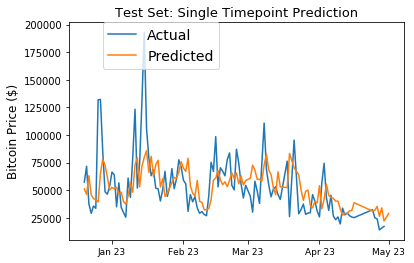

In [27]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['VOLUME'][window_len:-1], label='Actual')
ax1.plot(new_model_data[new_model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['VOLUME'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [11]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/20
 - 9s - loss: 0.0159
Epoch 2/20
 - 7s - loss: 0.0065
Epoch 3/20
 - 7s - loss: 0.0056
Epoch 4/20
 - 8s - loss: 0.0050
Epoch 5/20
 - 8s - loss: 0.0046
Epoch 6/20
 - 7s - loss: 0.0045
Epoch 7/20
 - 7s - loss: 0.0042
Epoch 8/20
 - 7s - loss: 0.0044
Epoch 9/20
 - 8s - loss: 0.0046
Epoch 10/20
 - 8s - loss: 0.0041
Epoch 11/20
 - 9s - loss: 0.0039
Epoch 12/20
 - 9s - loss: 0.0042
Epoch 13/20
 - 10s - loss: 0.0040
Epoch 14/20
 - 9s - loss: 0.0038
Epoch 15/20
 - 8s - loss: 0.0040
Epoch 16/20
 - 8s - loss: 0.0040
Epoch 17/20
 - 8s - loss: 0.0035
Epoch 18/20
 - 8s - loss: 0.0039
Epoch 19/20
 - 8s - loss: 0.0039
Epoch 20/20
 - 8s - loss: 0.0044


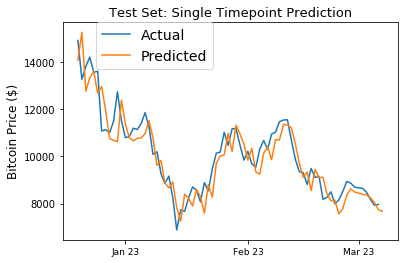

[ 14063.58567345  15246.48416042  12758.88454771  13305.67721438
  13591.91430807  12665.14439583  12946.7326194   11947.14198112
  10759.35406685  10670.84977651  10618.48945618  12373.05366254
  11365.52034616  10792.13240117  10653.66838956  10757.06034184
  10771.83477023  10962.44374871  11505.96581179  10757.83066809
   9612.19784641   9822.80673695   8878.36131597   8659.22435558
   8910.21509224   7818.27738345   7252.4239707    8393.56900406
   8223.43248278   7892.12826866   8593.46275902   8292.51820296
   7590.18464577   8810.01246452   8267.24423039   9691.42293835
  10013.87799797  10053.49553227  10970.50455298  10202.042377
  11311.89584389  10943.99332786  10513.48629754   9835.01263819
  10328.57343125   9334.29412544   9241.46532118  10129.49193448
  10406.2068522    9853.97973728  10706.80557632  10688.9461627
  11346.91409683  11323.61937761  11201.76567929  10521.76751602
   9705.73135614   9109.56496525   9335.8340292    8550.13276577
   9446.66987371   9105.3241

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:-1], label='Actual')
ax1.plot(new_model_data[new_model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()
print(((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0])
print(test_set['LAST'][window_len:-1])
#print(len(test_set['LAST'][window_len:-1]),len((bt_model.predict(LSTM_test_inputs))))
temp=((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0]
temp=temp[:-1]
print(temp)
#for x in range(366,441):
#    print(new_model_data[new_model_data['DATE']>= split_date]['DATE'][x]," | ",test_set['LAST'][x]-temp[x-366])
#print(new_model_data[new_model_data['DATE']>= split_date]['DATE'][window_len:-1],test_set['LAST'][window_len:-1]-temp)
#print(new_model_data[new_model_data['DATE']>= split_date]['DATE'][window_len:-1])

In [66]:
def build_model2(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    return model

In [14]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model2(LSTM_training_inputs, output_size=1, neurons = 512)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=50, batch_size=128, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 6s - loss: 0.0173 - mean_absolute_error: 0.1120
Epoch 2/50
 - 3s - loss: 0.0235 - mean_absolute_error: 0.1136
Epoch 3/50
 - 3s - loss: 0.0144 - mean_absolute_error: 0.0940
Epoch 4/50
 - 3s - loss: 0.0137 - mean_absolute_error: 0.0930
Epoch 5/50
 - 3s - loss: 0.0116 - mean_absolute_error: 0.0867
Epoch 6/50
 - 3s - loss: 0.0112 - mean_absolute_error: 0.0808
Epoch 7/50
 - 3s - loss: 0.0106 - mean_absolute_error: 0.0744
Epoch 8/50
 - 3s - loss: 0.0098 - mean_absolute_error: 0.0722
Epoch 9/50
 - 3s - loss: 0.0095 - mean_absolute_error: 0.0771
Epoch 10/50
 - 3s - loss: 0.0080 - mean_absolute_error: 0.0687
Epoch 11/50
 - 3s - loss: 0.0070 - mean_absolute_error: 0.0597
Epoch 12/50
 - 3s - loss: 0.0085 - mean_absolute_error: 0.0701
Epoch 13/50
 - 3s - loss: 0.0082 - mean_absolute_error: 0.0684
Epoch 14/50
 - 3s - loss: 0.0065 - mean_absolute_error: 0.0591
Epoch 15/50
 - 3s - loss: 0.0070 - mean_absolute_error: 0.0584
Epoch 16/50
 - 3s - loss: 0.0048 - mean_absolute_error: 0.0523
E

KeyboardInterrupt: 

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [ ]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['LAST'])-pred_range):
    LSTM_training_outputs.append((training_set['LAST'][i:i+pred_range].values/
                                  training_set['LAST'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,20)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,20).strftime('%b %d') for j in range(2) for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][10:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][10:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            #(test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
             #xy=(0.75, 0.9),  xycoords='axes fraction',
            #xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [ ]:
# little bit of reformatting the predictions to closing prices

bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['LAST'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, (ax1) = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,20)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,20).strftime('%b %d')for j in range(2)  for i in range(12)])
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
for i, (bt_pred) in enumerate(bt_pred_prices):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime)[pred_range:pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})
fig.tight_layout()
plt.show()